In [1]:
# Beginning of question #1 (Setup and Data Fetching)
import pandas as pd
import os

abs_path = os.path.join(os.path.dirname("bank-additional-full.csv"), "bank-additional-full.csv")
df = pd.read_csv(abs_path, sep = ";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [31]:
df = df.dropna()
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [32]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [87]:
# Beginning of question #2 (Data Preprocessing)
int_data, obj_data, float_data = [],[],[]
columns, dtypes = zip(*df.dtypes.items())
columns = list(columns)
dtypes = list(dtypes)
for i in range(len(columns)):
    if dtypes[i] == 'int64':
        int_data.append(columns[i])
    elif dtypes[i] == 'object':
        obj_data.append(columns[i])
    elif dtypes[i] == 'float64':
        float_data.append(columns[i])

print(int_data)
print(obj_data)
print(float_data)

['age', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [2]:
df = df[~df.job.str.contains("unknown")]
df = df[~df.marital.str.contains("unknown")]
df = df[~df.education.str.contains("unknown")]
df = df[~df.default.str.contains("unknown")]
df = df[~df.housing.str.contains("unknown")]
df = df[~df.loan.str.contains("unknown")]
df = df[~df.contact.str.contains("unknown")]
df = df[~df.month.str.contains("unknown")]
df = df[~df.day_of_week.str.contains("unknown")]
df = df[~df.poutcome.str.contains("unknown")]
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [89]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,259.484092,2.521451,956.332295,0.194273,-0.071510,93.523311,-40.602263,3.459938,5160.813409
std,10.333529,261.714262,2.720150,201.373292,0.522788,1.610399,0.585374,4.789249,1.777231,75.158065
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,45.000000,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [90]:
df['y'].value_counts()

no     26629
yes     3859
Name: y, dtype: int64

There are too many "no" values compared to "yes" in the y data column supporting an imbalanced #s of positives and negatives.

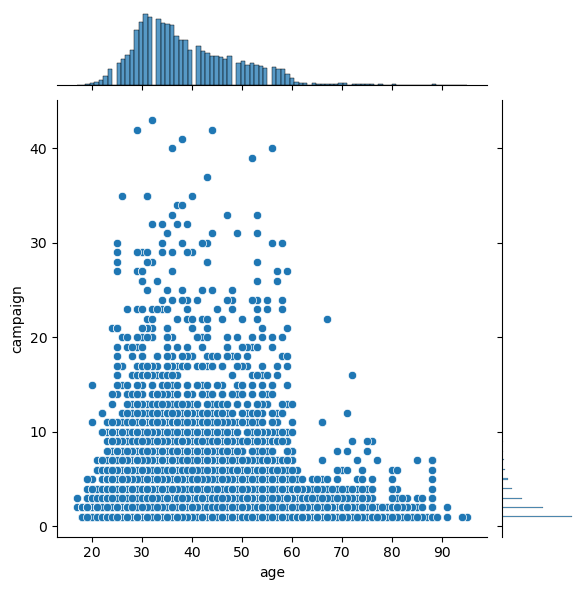

In [91]:
import seaborn as sns

age = df['age']
campaign = df['campaign']

sns.jointplot(x=age, y=campaign, kind='scatter')

So this means that the duration of the last contact was significantly longer in people in the ages between 20 to 60.

<AxesSubplot:>

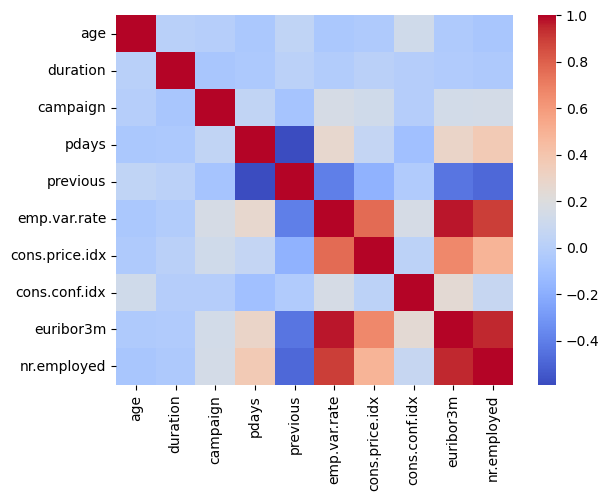

In [38]:
numeric_df = df[int_data + float_data]
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')

We can see that the data features in integer values are not really correlated whereas the other features in floating point numbers have higher/stronger correlation to each other. It should not always be the case but variables stored as integers often represent categorical or discrete variables with a limited number of values, whereas variables stored as floating point numbers often represent continuous variables with a wider range of values. As a result, integer variables are less likely to be correlated with each other, whereas floating point variables are more likely to be correlated with each other. 

In [149]:
df_encoded = pd.get_dummies(df, columns = obj_data)
df_encoded

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


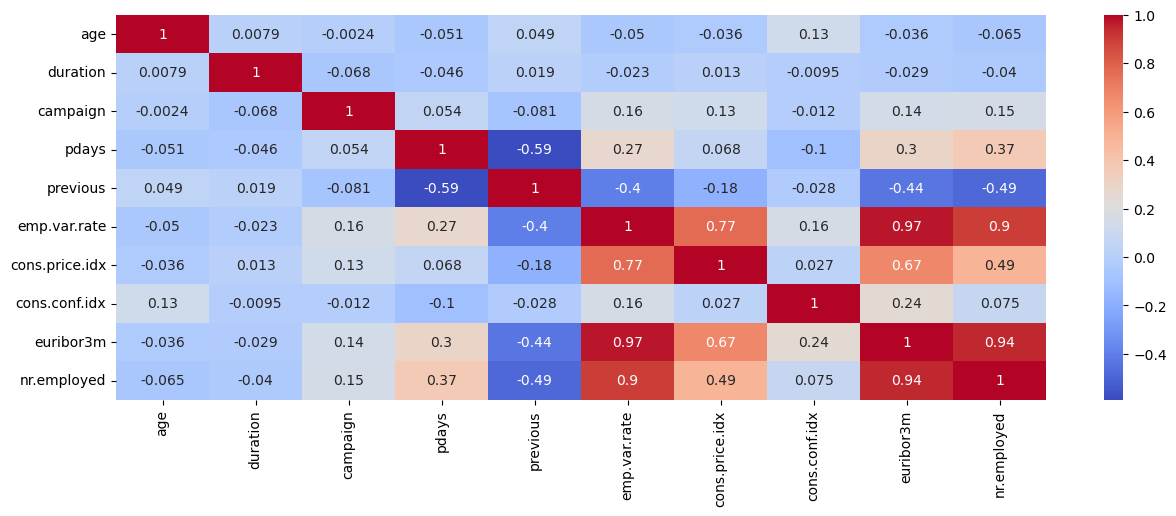

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
objects = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numbers = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
corr_matrix = df[numbers+objects].corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [14]:
numbers.remove('nr.employed')
numbers.remove('emp.var.rate')
print(numbers)

['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx']


In [17]:
revised_df = df[numbers+objects]
target = df['y']

In [19]:
from sklearn.model_selection import train_test_split
import numpy as np
target = np.array(target).reshape(-1,1)

In [20]:
revised_df

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,261,1,999,0,93.994,-36.4,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
2,37,226,1,999,0,93.994,-36.4,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,40,151,1,999,0,93.994,-36.4,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,56,307,1,999,0,93.994,-36.4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
6,59,139,1,999,0,93.994,-36.4,admin.,married,professional.course,no,no,no,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,94.767,-50.8,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,46,383,1,999,0,94.767,-50.8,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,56,189,2,999,0,94.767,-50.8,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,44,442,1,999,0,94.767,-50.8,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [22]:
revised_df = pd.get_dummies(revised_df, columns=objects)
revised_df

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,job_admin.,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,93.994,-36.4,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,93.994,-36.4,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,93.994,-36.4,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,93.994,-36.4,0,0,0,...,0,0,0,1,0,0,0,0,1,0
6,59,139,1,999,0,93.994,-36.4,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,94.767,-50.8,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,94.767,-50.8,0,1,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,94.767,-50.8,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,94.767,-50.8,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(revised_df, target, test_size = 0.2, random_state = 42)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is de

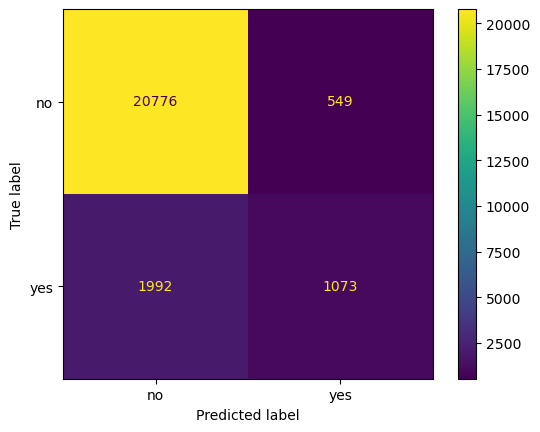

In [25]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
plot_confusion_matrix(lr, X_train, y_train)

/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


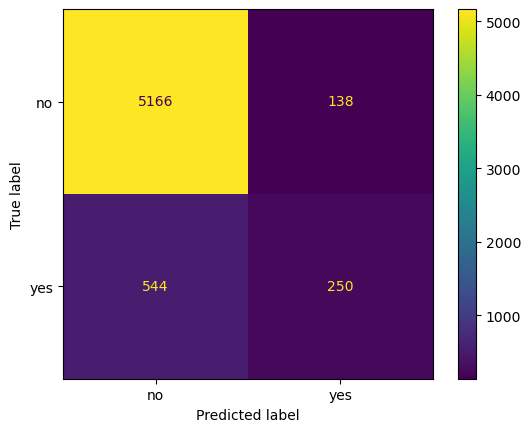

In [26]:
plot_confusion_matrix(lr, X_test, y_test)

/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


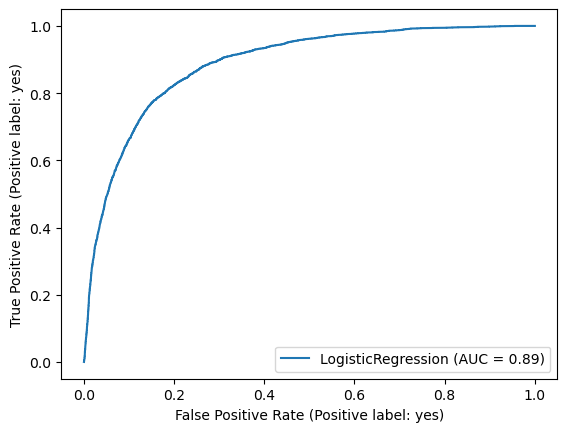

In [27]:
plot_roc_curve(lr, X_train, y_train)

/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


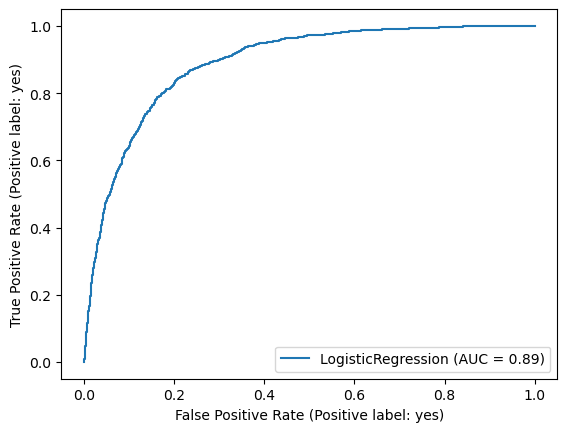

In [28]:
plot_roc_curve(lr, X_test, y_test)

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.97      0.94      5304
         yes       0.64      0.31      0.42       794

    accuracy                           0.89      6098
   macro avg       0.77      0.64      0.68      6098
weighted avg       0.87      0.89      0.87      6098



In [31]:
# Print the coefficients of the model
print('Coefficients:\n', lr.coef_)
print("\n")

# Print the intercept of the model
print('Intercept:', lr.intercept_)
print("\n")

# Print the probability estimates for the testing set
proba = lr.predict_proba(X_test)
print('Probability estimates:\n', proba)
print("\n")

Coefficients:
 [[ 1.29693264e-02  4.02648733e-03 -8.72572640e-02 -2.08166960e-03
   2.07960225e-01 -4.17336042e-03  3.82435493e-02  1.44331630e-01
  -2.41115236e-01 -3.44129851e-02 -1.30708640e-02 -1.91285187e-02
   1.40563006e-01  7.39279317e-03 -7.62432067e-02  1.08899008e-01
  -3.78990014e-02  2.90529569e-02 -6.20955126e-02 -1.85642260e-01
   2.56107354e-01 -2.26279017e-02 -4.65369754e-02 -1.36841550e-01
  -1.26951216e-02  2.37385683e-03 -1.25481620e-03  2.25952090e-01
   8.54157739e-03 -1.71995518e-04 -3.65357574e-02  4.49053393e-02
   2.14385277e-02 -1.30689459e-02  5.38626689e-01 -5.30257107e-01
   2.42256726e-01 -1.00521530e-01  3.20650299e-02 -1.50949940e-01
   6.47506585e-02  2.25633549e-01 -4.56939732e-01 -1.38396077e-01
   1.79240987e-01  1.11229911e-01 -7.76264477e-03 -3.89713798e-02
   3.40428322e-02  2.10152032e-02  4.55710352e-05  1.11951060e-01
  -1.35000288e-01  3.14188099e-02]]


Intercept: [0.00837163]


Probability estimates:
 [[0.96889489 0.03110511]
 [0.81984114 0

In [32]:
linear_combination = np.dot(X_test, lr.coef_.T) + lr.intercept_
# Apply the sigmoid function to the linear combination
sigmoid = 1 / (1 + np.exp(-linear_combination))
# Print the probability estimates from the manual calculation
print('Probability estimates from manual calculation: \n', sigmoid)

Probability estimates from manual calculation: 
 [[0.03110511]
 [0.18015886]
 [0.43317467]
 ...
 [0.05021488]
 [0.04655324]
 [0.00284094]]


The probability estimates obtained through manual calculation are consistent with those from logistic regression. While both logistic regression and linear regression are methods for understanding how an outcome is related to one or more factors, they differ in their application. Logistic regression is used when the outcome is binary, resulting in a "yes" or "no" answer. In contrast, linear regression is used when the outcome is a number. Logistic regression calculates the probability of an outcome occurring based on the factor values, providing an answer between 0 and 1. On the other hand, linear regression calculates the predicted outcome value based on factor values, providing a continuous answer. A logistic regression model with 100% accuracy may be overfitting the training data, meaning that it has memorized the data instead of detecting the underlying patterns. To identify overfitting, the model's accuracy on new and unseen data (test data) should be compared to that on the training data. If the accuracy of the model on test data is considerably lower than its accuracy on the training data, it may be overfitting.

In [34]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.datasets import make_classification



# Define the hyperparameters to test
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Perform grid search using cross-validation to find the best hyperparameters
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by grid search
print('Best hyperparameters:', grid_search.best_params_)

# Evaluate the model using cross-validation with the best hyperparameters
cross_val_scores = cross_val_score(grid_search.best_estimator_, X_test, y_test, cv=5)
print('Cross-validation scores:', cross_val_scores)
print('Mean cross-validation score:', cross_val_scores.mean())

/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHE

Best hyperparameters: {'C': 1, 'penalty': 'l2'}
Cross-validation scores: [0.89098361 0.8852459  0.88442623 0.88843314 0.89007383]
Mean cross-validation score: 0.8878325421267096


/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHE

Cross-validation and grid search techniques help in enhancing the logistic regression model's performance by tuning its hyperparameters. Through the optimization process, the best set of hyperparameters is determined, allowing the model to fit the data more effectively and generalize well to new, unseen data. Ultimately, the outcome is an improvement in the accuracy or other performance metric of the model, providing a significant lift in the model's performance.